In [1]:
%matplotlib inline
%pylab inline

import pandas as pd
import seaborn as sns

from __future__ import division  # чтобы 1/2 = было равно 0.5, а не 0


from pylab import rcParams
rcParams['figure.figsize'] = 5, 3  # чтобы дефолтные размеры графиков были поменьше

Populating the interactive namespace from numpy and matplotlib


# Смотрим на данные:

In [2]:
df = pd.read_csv('credit_train.csv', sep=';', encoding='cp1251', decimal=',')
df_test = pd.read_csv('credit_test.csv', sep=';', encoding='cp1251', decimal=',')

## Таргет:

In [3]:
df.open_account_flg.value_counts(normalize=True)
# 1 - клиент взял кредит Тинькофф
# 0 - клиент отказался

0    0.823972
1    0.176028
Name: open_account_flg, dtype: float64

## Колонки с данными:

### Пол

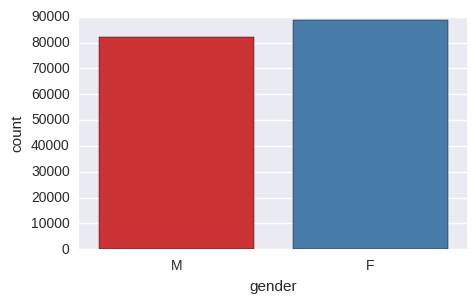

In [4]:
_ = sns.countplot(df.gender, palette='Set1')

### Возраст

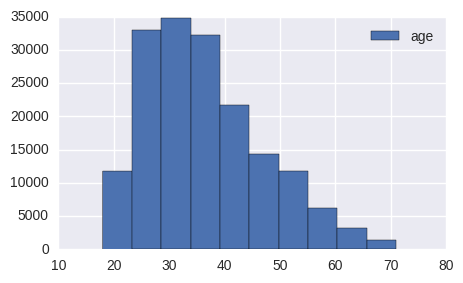

In [5]:
_ = df.age.hist(label='age')
_ = legend()

### Семейное положение

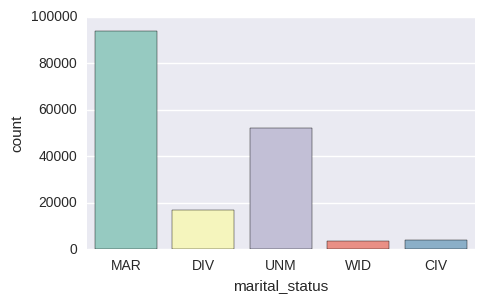

In [6]:
_ = sns.countplot(df.marital_status, palette='Set3')

### Работа
- SPC	Неруководящий сотрудник - специалист
- DIR	Руководитель организации
- HSK	Домохозяйка
- INV	Не работает (инвалидность)
- WOI	Работает на ИП
- WRK	Неруководящий сотрудник - рабочий
- ATP	Неруководящий сотрудник - обслуживающий персонал
- WRP	Работающий пенсионер
- UMN	Руководитель подразделения
- NOR	Не работает
- PNS	Пенсионер
- BIS	Собственный бизнес
- INP	Индивидуальный предприниматель

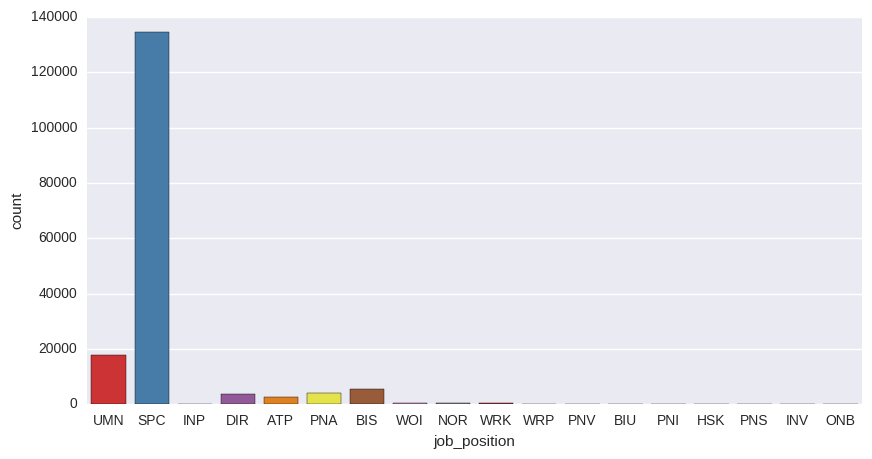

In [7]:
figure(figsize=(10, 5))
_ = sns.countplot(df.job_position, palette='Set1')

In [8]:
df.job_position.value_counts(dropna=False)

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64

### Размер кредита

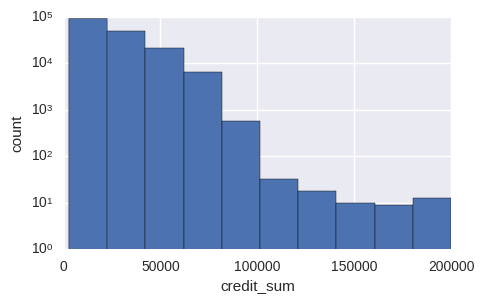

In [9]:
hist(df.credit_sum, log=True)
xlabel('credit_sum')
_ = ylabel('count')

### Когда будем возвращать?

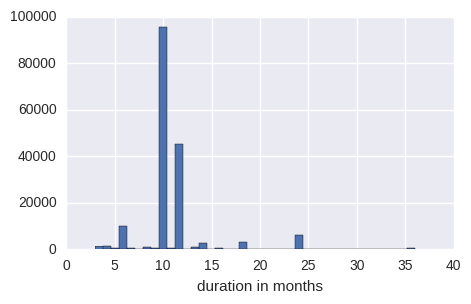

In [10]:
hist(df.credit_month, bins=40)
_ = xlabel('duration in months')

### Есть разные тарифы....

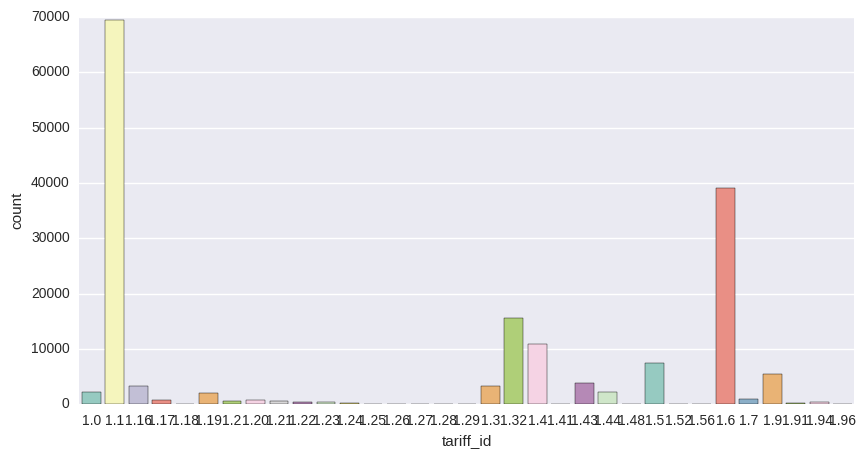

In [11]:
figure(figsize=(10, 5))
_ = sns.countplot(df.tariff_id, palette='Set3')

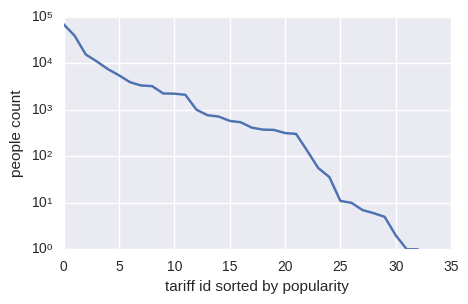

In [12]:
plot(df.tariff_id.value_counts().values)
yscale('log')
_ = xlabel('tariff id sorted by popularity')
_ = ylabel('people count')

In [13]:
# ^^^^^^видим, что популярность различных тарифов задается логарифмическим законом

### Какая-то непонятная величина с нормальным распределением

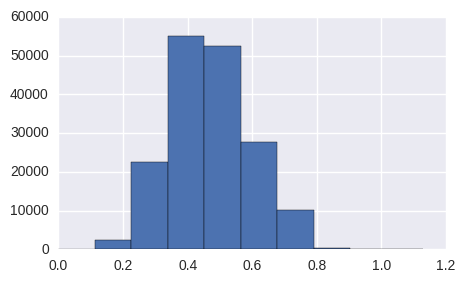

In [14]:
_ = hist(df.score_shk)

### Образование

- SCH	Начальное, среднее
- PGR	Второе высшее
- GRD	Высшее
- UGR	Неполное высшее
- ACD	Ученая степень

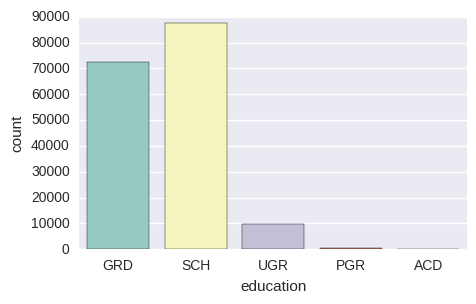

In [15]:
_ = sns.countplot(df.education, palette='Set3')

### Место жительства

In [16]:
df.living_region.value_counts(dropna=False, normalize=True)

ОБЛ МОСКОВСКАЯ                              0.071615
КРАСНОДАРСКИЙ КРАЙ                          0.043673
САНКТ-ПЕТЕРБУРГ                             0.032985
МОСКВА                                      0.032381
ТАТАРСТАН РЕСП                              0.030378
РЕСП БАШКОРТОСТАН                           0.028305
ОБЛ ИРКУТСКАЯ                               0.023895
СВЕРДЛОВСКАЯ ОБЛ                            0.023462
МОСКВА Г                                    0.021359
ОБЛ НИЖЕГОРОДСКАЯ                           0.020820
ОБЛ ЛЕНИНГРАДСКАЯ                           0.018911
РОСТОВСКАЯ ОБЛ                              0.017722
КРАСНОЯРСКИЙ КРАЙ                           0.017154
ЧЕЛЯБИНСКАЯ ОБЛ                             0.017008
ОБЛ САМАРСКАЯ                               0.016645
ОБЛ КЕМЕРОВСКАЯ                             0.016563
ПЕРМСКИЙ КРАЙ                               0.015907
САНКТ-ПЕТЕРБУРГ Г                           0.015421
КРАЙ СТАВРОПОЛЬСКИЙ                         0.

### Доход

NaNs: 1


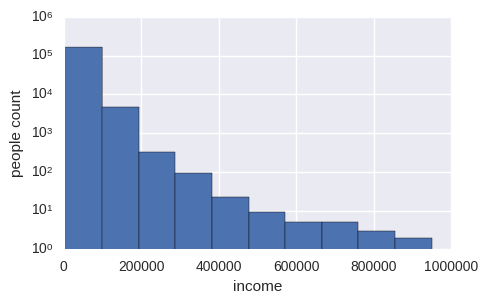

In [17]:
print 'NaNs:', sum(np.isnan(df.monthly_income.values))
df.monthly_income.hist(log=True)
xlabel('income')
_ = ylabel('people count')

NaNs: 9230


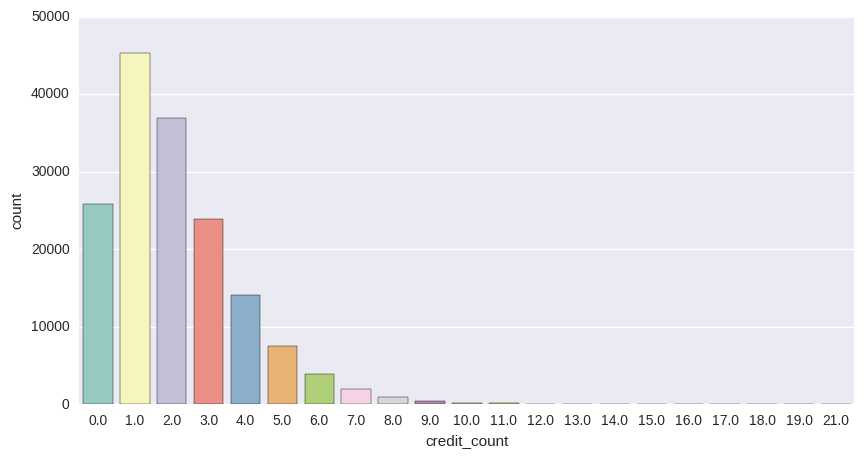

In [18]:
figure(figsize=(10, 5))
print 'NaNs:', sum(np.isnan(df.credit_count.values))
_ = sns.countplot(df.credit_count, palette='Set3')

NaNs: 9230


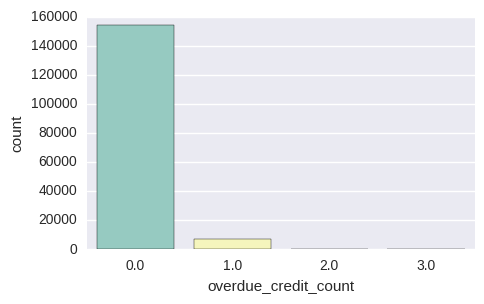

In [19]:
print 'NaNs:', sum(np.isnan(df.overdue_credit_count.values))
_ = sns.countplot(df.overdue_credit_count, palette='Set3')

### Матрица корреляции:

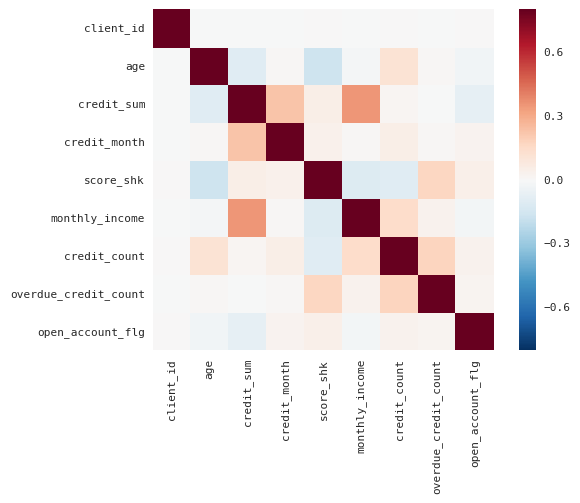

In [20]:
sns.set(context="paper", font="monospace")

corrmat = df.corr()
_ = sns.heatmap(corrmat, vmax=.8, square=True)

Можно заметить, что таргет (который open_account_flg) ни с чем не коррелирует - скорее всего задача не решается простой эвристикой

## Преобразование категориальных фич:

In [21]:
df.columns

Index([u'client_id', u'gender', u'age', u'marital_status', u'job_position',
       u'credit_sum', u'credit_month', u'tariff_id', u'score_shk',
       u'education', u'living_region', u'monthly_income', u'credit_count',
       u'overdue_credit_count', u'open_account_flg'],
      dtype='object')

#### Пол, семейное положение, работу, образование закодируем dummy encoding'ом , потому категорий внутри каждого мало:

In [22]:
df[u'gender_'] = df.gender.map({'M': 0, 'F': 1})
df_test[u'gender_'] = df_test.gender.map({'M': 0, 'F': 1})

In [23]:
def add_dummies(df, column_name, prefix):
    dummies = pd.get_dummies(df[column_name], prefix=prefix, drop_first=True)
    return pd.concat([df, dummies], axis=1)

In [24]:
df = add_dummies(df, 'marital_status', 'mar')
df_test = add_dummies(df_test, 'marital_status', 'mar')

In [25]:
df = add_dummies(df, 'job_position', 'job')
df_test = add_dummies(df_test, 'job_position', 'job')

In [26]:
df = add_dummies(df, 'education', 'edu')
df_test = add_dummies(df_test, 'education', 'edu')

Здесь мы предполагали, что в тестовом датасете присутствуют все категории, что и в трейне, иначе будет сюрприз, когда алгоритму на вход выдадут больше колонок, чем те, на которых он обучался

#### Номер тарифа и регион закодируем через частоту, потому как слишком много тарифов:

In [27]:
tariff2frequency = dict(df['tariff_id'].value_counts(normalize=True))  
# нормализация нужна, если мы захотим использовать что-то кроме древесных алгоритмов. 
# Важно чтобы колонки не сильно отличались по разбросу чисел. У нас везде [0..1] - пусть и тут будет также
df[u'tariff_freq'] = df['tariff_id'].map(lambda x: tariff2frequency[x])
# df_test[u'tariff_freq'] = df_test['tariff_id'].map(lambda x: tariff2frequency[x])

# - здесь у меня возникла проблема, т.к. оказывается в tariff_freq были не только строчки, 
# но и числа nan, при этом в dict они почему-то не ложились. Выкрутился я так:

from collections import Counter
tariff2count = Counter(df['tariff_id'])
# нормализация нужна, если мы захотим использовать что-то кроме древесных алгоритмов. 
# Важно чтобы колонки не сильно отличались по разбросу чисел. У нас везде [0..1] - пусть и тут будет также
df[u'tariff_freq'] = df['tariff_id'].map(lambda x: tariff2count[x] / len(df))
df_test[u'tariff_freq'] = df_test['tariff_id'].map(lambda x: tariff2count[x] / len(df))

Важно! tariff2frequency - это dict из трейна. Можно было бы взять объединенные данные по трейну и тесту, и, кажется, так и нужно было сделать. Точно не нужно преобразовывать колонку tariff_freq из теста по частотам tariff_id теста - в таком случае частоты будут не те, на которых мы обучались.

In [28]:
region2count = Counter(df['living_region'])
df[u'region_freq'] = df['living_region'].map(lambda x: region2count[x] / len(df))
df_test[u'region_freq'] = df_test['living_region'].map(lambda x: region2count[x] / len(df))

Можно и нужно закодировать через любую другую колонку! Кодирование через частоту из нашей колонки достает только ифонмацию о том, на сколько популярно было данное значение. Например, пришел ли клиент из большого региона (МО), или из малонаселенного района. Если мы закодируем через средний достаток - мы поймем, насколько люди в этом регионе богаты и мб в комбинации с достатком человека это даст нам хорошую информацию: насолько человек относительно богат.

Можно и нужно попробовать через dummy, но у меня предчувствие, что это приведет к переобучению.

### Нормализация и работа с пропусками:

In [29]:
train_columns = set(df.columns)
columns_transformed = set((u'education', u'gender', u'job_position', 
                           u'living_region', u'marital_status', u'tariff_id'))
target_column = set([u'open_account_flg'])
train_columns -= columns_transformed
train_columns -= target_column
train_columns = sorted(list(train_columns))

#### Посмотрим, сколько у нас колонок с пропусками:

In [30]:
len(df_test['age'])

91940

In [31]:
for column in train_columns: 
    if sum(isnan(df[column])) > 0 or sum(isnan(df_test[column])) > 0:
        print column, sum(isnan(df[column])), sum(isnan(df_test[column]))

credit_count 9230 4703
monthly_income 1 0
overdue_credit_count 9230 4703


Есть 2 частых подхода при работе с пропусками, когда вы не знаете, что там может стоять. 
- поставить в пропуск число, которое сильно отличается от датасета. Например, -50. Этот подход хорош для древесных алгоритмов, потому что они выделят под этот класс объектов отдельный лист. Но это будет точно плохо работать с линейными или метрическими алгоритмами, потому что это просто рандомное число, и ни на что его умножать 

- поставить в пропуск самое часто встречающееся число (или среднее/медиану по датасету). Первое предположение, что если число пропущено - скорее всего там стояло что-то часто встречающееся. Если у вас есть какие-то дополнительные знания о том, что там могло стоять - можно воспользоваться ими. Например, можно подставить то число, которое часто встречается для объектов с аналогичным значением в другой колонке. Например, если вы по матрице корреляции видете, что credit_count немного коррелирует с достатком, то можно смотреть на достаток и в пропуск вставлять то значение credit_count, которое имеет человек с аналогичным достатком.

In [32]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
X_train = imputer.fit_transform(df[train_columns])
X_test = imputer.transform(df_test[train_columns])  
# заметим, что мы заменяем пропуски в тесте медианоми из трейна. Объяснение см. выше, где про частоты написано

Все величины, которые имеют матожидание != 0 и дисперсию != 1 должны быть отскейлены. Иначе l2-нормализация линейных алгоритмах (log regression, svm) зарубит веса у тех фичей, которые имеют меньший разброс и нулевое мат. ождание. Метрические алгоритмы (KNN, SVM с RBF-ядром) сломаются, потому как расстояние будет меряться неравнозначно по разным координатам: некоторые фичи автоматически станут важнее, просто потому что разброс координаты у них будет больше.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X = X_train_scaled
y = df['open_account_flg']

# Ура! Мы как-то подготовили данные. Давайте же обучим что-то!

#### Самое простое - обучить лес с oob_score:

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=24)
RF.fit(X_train_scaled, y)
RF.oob_score_

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.79819146568587263

Довольно неплохо! Давайте разобьем на 3 фолда (чтобы не ждать долго) и попробуем найти оптимальный алгоритм. 

In [36]:
# Предупреждение: это довольно долгая операция:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=24)
cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc')  # в конкурсе просят оптимизировать roc_auc

array([ 0.74139372,  0.74158779,  0.7428353 ])

ок, 0.741 - это неплохой AUC ROC. Если <a href="https://boosters.pro/champ_3#">посмотреть на лидерборд</a>, то у первого места 0.774, а 0.741 в районе 200-го места. Если допустить, что тестовая выборка даст нам результат аналогичный кросс-валидации, то можно уже радоваться.

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, n_jobs=24)
cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc')

array([ 0.63033846,  0.62779923,  0.62939945])

Этот код выполняется вечность, так что я его закомментировал:

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()


# from sklearn.model_selection import RandomizedSearchCV
# param_distributions = {'weights': ['uniform', 'distance'], 
#                        'n_neighbors': range(1, 20, 2), 
#                        'p': np.arange(0.1, 5, 0.2)}

# grid_searcher = RandomizedSearchCV(clf, param_distributions, n_iter=10, 
#                                    cv=kfold, n_jobs=24, scoring='roc_auc',
#                                    verbose=True)
# grid_searcher.fit(X, y)
# print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Тоже очень долго. Не дождался. Тут квадратичная сложность

In [ ]:
# from sklearn.svm import SVC
# clf = SVC(random_state=42, kernel='linear')
# print 'linear:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 
# clf = SVC(random_state=42, kernel='poly')
# print 'poly:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 
# clf = SVC(random_state=42, kernel='rbf')
# print 'rbf:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 

Давайте посмотри, как кол-во деревьев повлияет на итоговый результат. Мы будем считаться по oob_score. В данном случае он должен давать резульатат похожий на 3-fold валидацию, поскольку каждое дерево мы обучаем примерно на 2/3 выборки и на 1/3 получаем score.

<b>warm_start</b> позволит добавлять деревья, а не переобучать весь лес заново. Можете попробовать убрать его из параметров и перезапустить.

Возможно, в этом месте правильнее было смотреть, как кол-во деревьев влияет на итоговую метрику, а не accuracy. Тогда нужно было бы хранить 3 леса и последовательно наращивать их деревья.

In [ ]:
RF = RandomForestClassifier(random_state=42, oob_score=True, warm_start=True, n_jobs=24)

oob_scores = []
for n_estimators in arange(24, 1500, 48):
    RF.n_estimators = n_estimators
    %time RF.fit(X, y)
    oob_score = RF.oob_score_
    oob_scores.append(oob_score)
    print n_estimators, oob_score

CPU times: user 29.7 s, sys: 196 ms, total: 29.9 s
Wall time: 3.62 s
24 0.813799444789
CPU times: user 59.4 s, sys: 328 ms, total: 59.7 s
Wall time: 7.69 s
72 0.822982676022
CPU times: user 1min 2s, sys: 336 ms, total: 1min 2s
Wall time: 9.96 s
120 0.824511262343
CPU times: user 1min 3s, sys: 928 ms, total: 1min 4s
Wall time: 12 s
168 0.825424900144


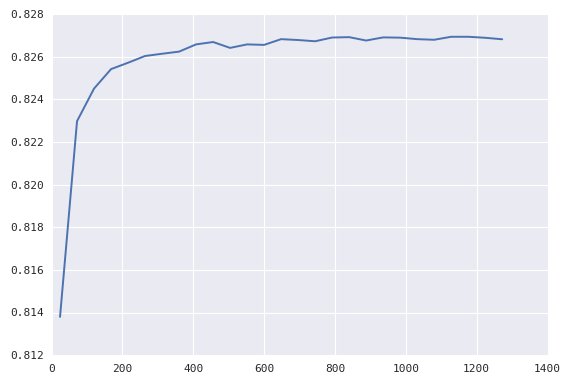

In [60]:
_ = plot(arange(24, 1500, 48)[:len(oob_scores)], oob_scores)

ок, выберем 600 деревьев и найдем лучше параметры. Когда найдем - посмотрим скор на 1200 деревьях

In [64]:
%%time
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'criterion': ['gini', 'entropy'], 
                       'max_features': ['sqrt', 'log2', None], 
                       'max_depth': [3, 10, 20, None],
                       'bootstrap': [True, False]}


RF = RandomForestClassifier(random_state=42, n_jobs=24, n_estimators=600)
grid_searcher = RandomizedSearchCV(RF, param_distributions, n_iter=20, 
                                   cv=kfold, scoring='roc_auc',
                                   verbose=True)
grid_searcher.fit(X, y)
print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 55.9min finished


best score: 0.753168095311 {'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20}
CPU times: user 13h 15min 50s, sys: 4min 27s, total: 13h 20min 18s
Wall time: 56min 46s


Всего лишь час ожидания - и мы нашли идеальные параметры. Это нам дало ~1% к скору. 

Ожидаемо, мы используем bootstrap, а при выборе фичей на каждом сплите ограничиваемся значением по умолчанию - sqrt из количества фичей. Немного удивительно, что оно выбрало max_depth=20. Давайте посмотрим, какие наборы гипер-параметров показывают близкие значения roc_auc:

In [68]:
grid_searcher.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.74740, std: 0.00100, params: {'max_features': None, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 20},
 mean: 0.74399, std: 0.00231, params: {'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10},
 mean: 0.68608, std: 0.00216, params: {'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.68308, std: 0.00215, params: {'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.68370, std: 0.00161, params: {'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3},
 mean: 0.74651, std: 0.00188, params: {'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.67983, std: 0.00576, params: {'max_features': None, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3},
 mean: 0.75207, std: 0.00171, params: {'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20},
 mean: 0.72609, std: 0.0023

Хм, есть ощущение, что надо попробовать max_depth=None просто не повезло соседствовать с хорошими гипер-параметрами. Давайте посмотрим:

In [69]:
RF = RandomForestClassifier(random_state=42, n_jobs=24, n_estimators=600, criterion= 'entropy')
cross_val_score(RF, X, y, cv=kfold, scoring='roc_auc')

array([ 0.74277825,  0.74368672,  0.74688361])

Кажется, глубина в 20 действительно что-то дает. Давайте еще поварьируем глубину..

In [76]:
RF = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=600, n_jobs=24)

oob_scores = []
for max_depth in [13, 17, 21, 25, 29, 33, 37]:
    RF.max_depth = max_depth
    %time RF.fit(X, y)
    oob_score = RF.oob_score_
    oob_scores.append(oob_score)
    print max_depth, oob_score

CPU times: user 9min 30s, sys: 1.82 s, total: 9min 32s
Wall time: 58.6 s
13 0.82755672168
CPU times: user 11min 11s, sys: 2.98 s, total: 11min 14s
Wall time: 1min 8s
17 0.828341513125
CPU times: user 12min, sys: 2.44 s, total: 12min 2s
Wall time: 1min 11s
21 0.828493786092
CPU times: user 12min 49s, sys: 2.8 s, total: 12min 52s
Wall time: 1min 17s
25 0.828042823844
CPU times: user 12min 44s, sys: 5.22 s, total: 12min 49s
Wall time: 1min 17s
29 0.826906633245
CPU times: user 12min 35s, sys: 3.79 s, total: 12min 39s
Wall time: 1min 19s
33 0.82689491994
CPU times: user 12min 41s, sys: 3.93 s, total: 12min 45s
Wall time: 1min 18s
37 0.826853923372


глубина 20 действительно дает лучший результат

## Давайте попробуем XGBoost.
Вообще, с этого стоило начать, но почему не оставить сладкое на потом? :)

Градиентный бустинг и его реализация <a href="http://xgboost.readthedocs.io/en/latest/">XGBoost</a> - самый популярный в соревнованиях алгоритм машинного обучения. Его принцип: последовательное добавление решающих деревьев к композиции. Каждое следующее дерево исправляет ошибки предыдущей композиции деревьев.

Я не смог за 5 минут нагуглить хорошую лекцию по GB, но Воронцов в своем курсеровском курсе дает хорошую вводную.

In [80]:
import xgboost as xgb
from xgboost import XGBClassifier

In [82]:
XGB = XGBClassifier()
cross_val_score(XGB, X, y, cv=kfold, scoring='roc_auc')

array([ 0.75151268,  0.7528221 ,  0.75616427])

Ну что ж, это на процент лучше чем RF. Есть смысл поварьировать параметры - оставляю это вам. В отличие от RF, тут нет такого правила, что чем больше деревьев - тем лучше. Увеличение дает переобучение, под это даже есть некоторая теоретическая база, хотя некоторые утверждают иначе. Не верьте им ;)

Давайте же скорее предскажем значения на настоящей тестовой выборке и займем почетное 1-е место.

In [86]:
# обучаем xgboost на всей выборке:
XGB.fit(X,y)
# оцениваем вероятность 1-го класса на тестовой выборке
probas = XGB.predict_proba(X_test_scaled)[:,1]

Генерируем файл-ответ:

In [95]:
df_to_save = pd.DataFrame(data={"_ID_" : df_test['client_id'], "_VAL_": probas}) 
df_to_save.to_csv("submission.csv", sep=',' , index=False)

Это нам дает <a href="https://boosters.pro/champ_3?success=0#">217 место на лидерборде</a>. Видимо, не только мы умеем пользоваться xgboost'ом  ;)

## Советы по улучшению.

0) в xgboost'е можно оптимизировать ранжирование (а ROC AUC - внезапно метрика качества ранжирования). Гуглить direct auc optimization, objective='rank:pairwise', eval_metric='auc'. У меня за 10 мин из этого ничего не вышло, но мб я просто мало копал.

1) Попробуйте поварьировать параметры xgboost'а, как мы это делали для RF. XGBoost обучается быстрее и это у вас займет меньше времени. Перед этим стоит оценить, сколько вам нужно фолдов. Я бы взял как минимум 5, потому как для 3-х фолдов, скор их среднего, дает какой-то рандом. То, как можно выбирать кол-во фолдов описано в 3-й лекции: https://github.com/CommanderDuck/express_ml/blob/master/lesson3/cross_validation.ipynb

2) вообще говоря, xgboost умеет более умно работать с пропусками данных, чем то, как мы с ними поступили. Погуглите эту тему. Попробуйте другие стратегии заполнения пропусков. Попробуйте другие способы преобразования категориальных фичей.

2.5) возможно, какие-то фичи портят решение. С xgboost'ом такое редко бывает, но не будет лишним попробовать повыкидывать по 1 фиче и посмотреть, не улучашется ли результат.

3) Стеккинг. Собственно, из-за этого понятие процессорное время на обучение решающего правила растягивается от 5 минут до бесконечности. Суть такая: мы с вами обучили 3 годных алгоритма: RF, XGB, LR. Давайте просуммируем их predict_proba с некоторыми коэффициентами, которые можем хоть перебором найти. Понятно, что более хорошие алгоритмы будут иметь более весомые коэффициенты. В принципе, мы можем взять все известные нам алгоритмы, взять все их гипер-парамеры, взять 100500 подвыборок от данных и 100500 различных преобразований с колонками данных (добавление/удаление тоже считается), все это смешать и получить супер-алгоритм, которы будет работать вечно и никогда не будет встроен в продакшен. Иногда это дает +1% или 2% к итоговому результату. 

Собственно, в конкурсах так и происходит. У людей уже написан код, который запускает эту махину на произвольных входных данных. Остается только курить трубку да поглядывать на прогресс. 

Конечно, все равно выигрывают те, кто подумал головой и нашел какие-то закономерности в данных. Как, например, длина шерсти из нашей задачки про shelter animals или фаза луны, в которой происходит кредитование. Такую зависимость перебором найти сложно. Но и без stacking уже не выиграешь ;)

<a href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/">Complete Guide to Parameter Tuning in XGBoost (with codes in Python) </a>

<a href="http://mlwave.com/kaggle-ensembling-guide/">Лучшая (хоть и не полная) статья про stacking</a>

<img src="http://risovach.ru/upload/2014/09/mem/koshecka_61329312_orig_.jpg" width=300>